In [37]:
%load_ext autoreload
%autoreload 2

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [152]:
from dataset import df

In [140]:
df
    

,Image_Name,Histological_Diagnosis,Common_Nevus,Atypical_Nevus,Melanoma,Asymmetry,Pigment_Network,Dots/Globules,Streaks,Regression_Areas,Blue-Whitish_Veil,White,Red,Light-Brown,Dark-Brown,Blue-Gray,Black
0,IMD003,NaN,1,0,0,0,T,A,A,A,A,0,0,0,1,0,0
1,IMD009,NaN,1,0,0,0,T,A,A,A,A,0,0,1,0,0,0
2,IMD016,NaN,1,0,0,0,T,T,A,A,A,0,0,1,1,0,0
3,IMD022,NaN,1,0,0,0,T,A,A,A,A,0,0,1,0,0,0
4,IMD024,NaN,1,0,0,0,T,A,A,A,A,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,IMD424,Melanoma,0,0,1,2,AT,AT,P,A,P,0,0,1,1,1,1
196,IMD425,Melanoma,0,0,1,2,AT,AT,A,P,P,0,0,1,1,1,1
197,IMD426,Melanoma,0,0,1,2,AT,A,A,P,A,0,0,1,1,0,0
198,IMD429,NaN,0,0,1,0,AT,A,P,A,P,0,0,1,1,1,1


In [119]:
df.dtypes

Image_Name                object
Histological_Diagnosis    object
Common_Nevus              object
Atypical_Nevus            object
Melanoma                  object
Asymmetry                  int64
Pigment_Network           object
Dots/Globules             object
Streaks                   object
Regression_Areas          object
Blue-Whitish_Veil         object
White                     object
Red                       object
Light-Brown               object
Dark-Brown                object
Blue-Gray                 object
Black                     object
dtype: object

In [85]:
cross_corr = df.corr()

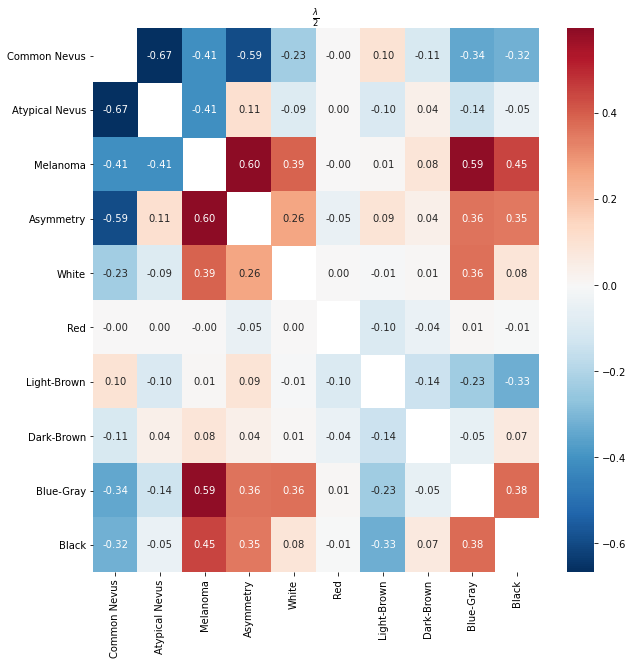

In [114]:
plt.figure(figsize=(10,10))
sns.heatmap(cross_corr, cmap='RdBu_r', center=0, annot=True, fmt='.2f', mask=np.eye(cross_corr.shape[0]));

In [2]:
import dataset

In [3]:
train_dataset, valid_dataset, test_dataset = dataset.generate_datasets()


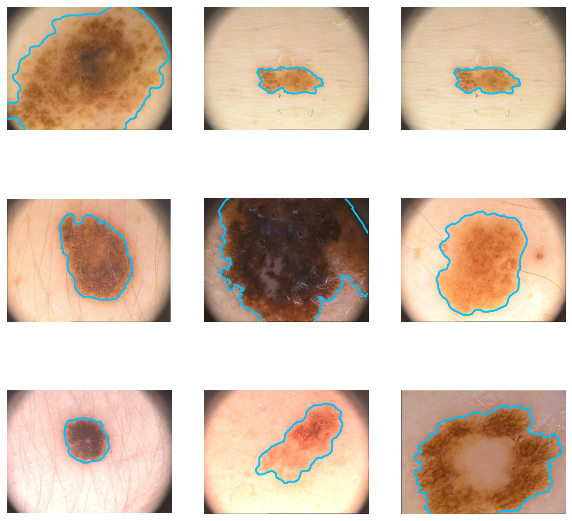

In [44]:
test_dataset.show_samples(3,3)

In [45]:
image, mask_1, description = test_dataset[0]
_, mask_2, _ = test_dataset[1]

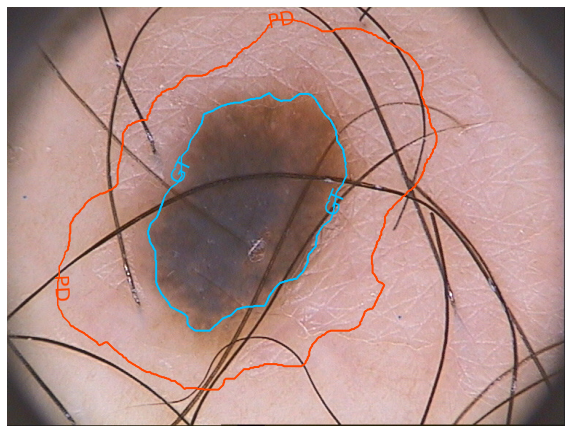

In [115]:
def compare_masks(image, gt_mask, pd_mask, ax=None):
    if ax is None:
        ax = plt.axes()
    ax.imshow(np.array(image, dtype=np.uint8))
    # ax.imshow(np.array(mask, dtype=np.uint8), cmap='', alpha=mask_alpha)
    cs1 = ax.contour(gt_mask, levels=1, colors='deepskyblue')
    cs2 = ax.contour(pd_mask, levels=1, colors='orangered')
    
    # print(cs1.levels[2])
    cl1 = ax.clabel(cs1, fmt='GT', inline=True, inline_spacing=10, fontsize=20)
    cl2 = ax.clabel(cs2, fmt='PD', inline=True, inline_spacing=10, fontsize=20)
    
    # print(cs1.levels)
    # print(cl1)
    
    ax.grid(False)
    ax.axis('off')
    ax.figure.set_size_inches(10,10)

compare_masks(image, mask_1, mask_2)
